# Sales & Customer Behaviour Insights
### Green Cart Ltd

## 1. Load the datasets

In [42]:
# Load the datasets into Pandas DataFrames
import pandas as pd

df_sales = pd.read_csv('sales_data.csv')
df_product = pd.read_csv('product_info.csv')
df_customer = pd.read_csv('customer_info.csv')

*View the datasets*

In [43]:
# View the head of the sales_data dataset
df_sales.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-25,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-25,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,06-07-25,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,06-07-25,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,06-07-25,DELAYED,Credit Card,West,0.20


In [44]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2997 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB


In [45]:
# View the head of the product_info dataset
df_product.head()

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


In [46]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


In [47]:
# View the head of the customer_info dataset
df_customer.head()

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze


In [48]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


## 2. Clean the data

*Convert date columns type to datetime*

In [49]:
# Convert the order_date's, launch_date, and signup_date columns type from object to datetime
df_sales['order_date'] = pd.to_datetime(
    df_sales['order_date'],
    format="%d-%m-%y",
    errors='coerce'
)

df_product['launch_date'] = pd.to_datetime(
    df_product['launch_date'],
    format="%d-%m-%y",
    errors='coerce'
)

df_customer['signup_date'] = pd.to_datetime(
    df_customer['signup_date'],
    format="%d-%m-%y",
    errors='coerce'
)

*Standardise text formatting*

* Visualise unique values

In [50]:
# Standardise inconsistent text values
# Check the unique values first

# sales_data
print("Check the unique values in the sales_data dataset")
print("\nUnique values in the quantity column: ", df_sales['quantity'].unique())
print("Unique values in the delivery_status column: ", df_sales['delivery_status'].unique())
print("Unique values in the payment_method column: ", df_sales['payment_method'].unique())
print("Unique values in the region column: ", df_sales['region'].unique())

# product_info
print("\nCheck the unique values in the product_info dataset")
print("Unique values in the category column: ", df_product['category'].unique())

# customer info
print("\nCheck the unique values in the customer_info dataset")
print("\nUnique values in the gender column: ", df_customer['gender'].unique())
print("Unique values in the region column: ", df_customer['region'].unique())
print("Unique values in the loyalty_tier column: ", df_customer['loyalty_tier'].unique())

Check the unique values in the sales_data dataset

Unique values in the quantity column:  ['3' '5' '1' '2' '4' nan 'three' 'five']
Unique values in the delivery_status column:  ['Delivered' ' DELAYED' 'delivered' ' Cancelled ' 'Delayed' 'delrd'
 'delyd' nan]
Unique values in the payment_method column:  ['PayPal' 'credit card' 'Bank Transfer' 'Credit Card' nan 'bank transfr']
Unique values in the region column:  ['Central' 'North' 'West' 'East' 'South' 'nrth']

Check the unique values in the product_info dataset
Unique values in the category column:  ['Storage' 'Cleaning' 'Kitchen' 'Personal Care' 'Outdoors']

Check the unique values in the customer_info dataset

Unique values in the gender column:  ['Male' 'Female' 'male' 'FEMALE' 'Other' 'femle' nan]
Unique values in the region column:  ['Central' 'West' 'North' 'South' 'East' nan]
Unique values in the loyalty_tier column:  ['Silver' ' gold ' 'GOLD' 'bronze' 'gld' nan 'brnze' 'sllver']


* Convert the misspelled unique values to a singular format and flag unrecognizable values

In [51]:
# Change the different types to a singular format
import numpy as np

df_sales['quantity'] = df_sales['quantity'].replace({
    'three': '3',
    'five': '5'
})

df_sales['delivery_status'] = df_sales['delivery_status'].replace({
    ' DELAYED': 'Delayed',
    'delivered': 'Delivered',
    'delrd': 'Delivered',
    'delyd': 'Delayed',
    ' Cancelled ': 'Cancelled'
})

df_sales['payment_method'] = df_sales['payment_method'].replace({
    'credit card': 'Credit Card',
    'bank transfr': 'Bank Transfer',
})

df_sales['region'] = df_sales['region'].replace({
    'nrth': 'North'
})


df_customer['gender'] = df_customer['gender'].replace({
    'male': 'Male',
    'FEMALE': 'Female',
    'femle': 'Female'
})

df_customer['loyalty_tier'] = df_customer['loyalty_tier'].replace({
    ' gold ': 'Gold',
    'GOLD': 'Gold',
    'bronze': 'Bronze',
    'gld': 'Gold',
    'brnze': 'Bronze',
    'sllver': 'Silver'
})

# Check for unique values again to make sure the replacement was correct
print(df_sales['quantity'].unique())
print(df_sales['delivery_status'].unique())
print(df_sales['payment_method'].unique())
print(df_sales['region'].unique())
print(df_customer['gender'].unique())
print(df_customer['loyalty_tier'].unique())

['3' '5' '1' '2' '4' nan]
['Delivered' 'Delayed' 'Cancelled' nan]
['PayPal' 'Credit Card' 'Bank Transfer' nan]
['Central' 'North' 'West' 'East' 'South']
['Male' 'Female' 'Other' nan]
['Silver' 'Gold' 'Bronze' nan]


*Validate numeric columns*

In [52]:
# Change quantity column's type from object to numeric
df_sales['quantity'] = pd.to_numeric(df_sales['quantity'])

# Check if there are any negative values in the numeric columns
quantity_negative = (df_sales['quantity'] < 0).any()
print(quantity_negative)

uprice_negative = (df_sales['unit_price'] < 0).any()
print(uprice_negative)

discount_negative = (df_sales['discount_applied'] < 0).any()
print(discount_negative)


False
False
False


*Handle duplicate rows*

* Check for any duplicate rows based on id

In [53]:
# Check for any duplicate rows based on id
print("Duplicate rows in sales_data dataset:")
print(df_sales[df_sales.duplicated(subset='order_id', keep=False)])

print("\nDuplicate rows in product_info dataset:")
print(df_product[df_product.duplicated(subset='product_id')])

print("\nDuplicate rows in customer_info dataset:")
print(df_customer[df_customer.duplicated(subset='customer_id')])

Duplicate rows in sales_data dataset:
     order_id customer_id product_id  quantity  unit_price order_date  \
156   O515400      C00103      P0024       4.0       44.15 2025-07-06   
793   O916245      C00390      P0010       1.0       24.57 2025-07-06   
1461  O515400      C00389      P0027       2.0       22.04 2025-07-06   
2712  O916245      C00070      P0011       3.0       20.83 2025-07-06   

     delivery_status payment_method region  discount_applied  
156        Delivered         PayPal   East              0.15  
793          Delayed         PayPal  South              0.10  
1461         Delayed         PayPal  North              0.05  
2712         Delayed  Bank Transfer   West              0.05  

Duplicate rows in product_info dataset:
Empty DataFrame
Columns: [product_id, product_name, category, launch_date, base_price, supplier_code]
Index: []

Duplicate rows in customer_info dataset:
    customer_id                     email signup_date gender   region  \
371         N

* Remove duplicate rows

In [54]:
# Remove duplicate rows
df_sales = df_sales.drop_duplicates(subset='order_id', keep=False)
print(df_sales[df_sales.duplicated(subset='order_id')])

df_customer = df_customer.drop_duplicates(subset='customer_id', keep=False)
print(df_customer[df_customer.duplicated(subset='customer_id')])

Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, unit_price, order_date, delivery_status, payment_method, region, discount_applied]
Index: []
Empty DataFrame
Columns: [customer_id, email, signup_date, gender, region, loyalty_tier]
Index: []


*Handle missing values*

* Identify missing values

In [55]:
print("Number of missing values in sales_data: ", df_sales.isnull().sum())
print("Number of missing values in product_info: ", df_product.isnull().sum())
print("Number of missing values in customer_info: ", df_customer.isnull().sum())

Number of missing values in sales_data:  order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            3
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64
Number of missing values in product_info:  product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64
Number of missing values in customer_info:  customer_id     0
email           6
signup_date     4
gender          4
region          3
loyalty_tier    2
dtype: int64


* Drop the rows with missing values for identifiers and columns that are crucial for analysis

In [56]:
df_sales.dropna(subset=["order_id", "customer_id", "product_id", "order_date", "delivery_status"], inplace=True)
df_customer.dropna(subset=["email", "signup_date"], inplace=True)

* Fill where appropriate

In [57]:
df_sales['discount_applied'] = df_sales['discount_applied'].fillna(0.0)
df_sales['payment_method'] = df_sales['payment_method'].fillna("Unknown")

df_customer['gender'] = df_customer['gender'].fillna("Other")

* Impute with mode values for missing values in categorical columns

In [58]:
sales_cols = ["quantity"]

for col in sales_cols:
    mode_vals = df_sales[col].mode()
    if not mode_vals.empty: # only fill if mode exists
        mode_val = mode_vals[0]
        df_sales.fillna({col: mode_val}, inplace=True)

customer_cols = ["gender", "region", "loyalty_tier"]

for col in customer_cols:
    mode_vals = df_customer[col].mode()
    if not mode_vals.empty: # only fill if mode exists
        mode_val = mode_vals[0]
        df_customer.fillna({col: mode_val}, inplace=True)

* Impute with median values for numeric columns

In [59]:
df_sales['unit_price'] = df_sales['unit_price'].fillna(df_sales['unit_price'].median())

*Re-check for any more missing values*

In [60]:
print("Number of missing values in sales_data: ", df_sales.isnull().sum())
print("Number of missing values in product_info: ", df_product.isnull().sum())
print("Number of missing values in customer_info: ", df_customer.isnull().sum())

Number of missing values in sales_data:  order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
dtype: int64
Number of missing values in product_info:  product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64
Number of missing values in customer_info:  customer_id     0
email           0
signup_date     0
gender          0
region          0
loyalty_tier    0
dtype: int64


## 3. Merge the datasets

In [61]:
df_sales_product = pd.merge(df_sales, df_product, on='product_id', how='left')

In [62]:
df_merged = pd.merge(df_sales_product, df_customer, on='customer_id', how='left')

In [63]:
df_merged.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,PayPal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-08-06,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-06,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-07-06,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-07-06,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold


In [64]:
df_merged.rename(columns={'region_x': 'sales_region'}, inplace=True)
df_merged.rename(columns={'region_y': 'customer_region'}, inplace=True)

In [65]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2982 non-null   object        
 1   customer_id       2982 non-null   object        
 2   product_id        2982 non-null   object        
 3   quantity          2982 non-null   float64       
 4   unit_price        2982 non-null   float64       
 5   order_date        2982 non-null   datetime64[ns]
 6   delivery_status   2982 non-null   object        
 7   payment_method    2982 non-null   object        
 8   sales_region      2982 non-null   object        
 9   discount_applied  2982 non-null   float64       
 10  product_name      2982 non-null   object        
 11  category          2982 non-null   object        
 12  launch_date       2982 non-null   datetime64[ns]
 13  base_price        2982 non-null   float64       
 14  supplier_code     2982 n

In [66]:
# Remove the rows that have a missing product_id
df_merged = df_merged.dropna(subset=['product_id'])

## 4. Feature Engineering

In [67]:
# 1. revenue
df_merged['revenue'] = df_merged['quantity'] * df_merged['unit_price'] * (1 - df_merged['discount_applied'])

# 2. order_week (ISO week number)
df_merged['order_week'] = df_merged['order_date'].dt.isocalendar().week

# 3. price_band using pd.cut
df_merged['price_band'] = pd.cut(
    df_merged['unit_price'],
    bins=[-np.inf, 15, 30, np.inf],
    labels=['Low', 'Medium', 'High']
)

# 4. days_to_order
df_merged['days_to_order'] = (df_merged['order_date'] - df_merged['launch_date']).dt.days

# 5. email_domain
df_merged['email_domain'] = df_merged['email'].apply(lambda x: x.split('@')[1] if pd.notnull(x) and '@' in x else np.nan)

# 6. is_late
df_merged['is_late'] = df_merged['delivery_status'].map(lambda x: x == 'Delayed')


df_merged[['revenue', 'order_week', 'price_band', 'days_to_order', 'email_domain', 'is_late']].head()

,revenue,order_week,price_band,days_to_order,email_domain,is_late
0,117.750,27,High,275,mills-logan.com,False
1,94.600,27,Medium,169,morgan.com,True
2,25.228,27,Medium,103,walters-smith.com,False
3,26.208,27,High,356,gmail.com,False
4,38.096,27,High,136,hotmail.com,True


## 5. Summary Tables

In [68]:
# Weekly revenue trends by region
# Using sales_region
weekly_revenue_by_region = df_merged.groupby(
    ['order_week', 'sales_region']
)['revenue'].sum().reset_index().pivot_table(
    index='order_week',
    columns='sales_region',
    values='revenue'
)

print(weekly_revenue_by_region)

sales_region     Central       East       North       South       West
order_week                                                            
27            47018.0115  47815.984  46764.0895  49652.7835  47729.822


In [69]:
# Product category performance (revenue, quantity, discount)
category_performance = df_merged.groupby('category').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'discount_applied': 'mean'
}).reset_index()

print(category_performance)

        category     revenue  quantity  discount_applied
0       Cleaning  93276.3445    3575.0          0.085684
1        Kitchen  33933.6760    1226.0          0.075622
2       Outdoors  40116.0260    1519.0          0.082016
3  Personal Care  24892.2765     900.0          0.087043
4        Storage  46762.3675    1726.0          0.080783


In [70]:
# Customer behaviour by loyalty_tier and signup_month
df_merged['signup_month'] = df_merged['signup_date'].dt.to_period('M').astype(str)

customer_behaviour = df_merged.groupby(['loyalty_tier', 'signup_month']).agg({
    'order_id': 'count',
    'revenue': 'sum',
    'quantity': 'sum'
}).rename(columns={'order_id': 'orders'}).reset_index()

print(customer_behaviour)

   loyalty_tier signup_month  orders     revenue  quantity
0        Bronze      2024-07      50   3421.0570     124.0
1        Bronze      2024-08      46   3831.0110     149.0
2        Bronze      2024-09      36   2685.4130     109.0
3        Bronze      2024-10      53   4247.2735     151.0
4        Bronze      2024-11      50   4149.2955     155.0
5        Bronze      2024-12      46   3588.0325     118.0
6        Bronze      2025-01      52   3867.3765     155.0
7        Bronze      2025-02      55   4756.9695     195.0
8        Bronze      2025-03      29   2767.9010      94.0
9        Bronze      2025-04      52   4082.6875     153.0
10       Bronze      2025-05      41   2838.5080     112.0
11       Bronze      2025-06      86   6322.6560     259.0
12         Gold      2024-07     134  11261.6970     405.0
13         Gold      2024-08     185  15645.4105     574.0
14         Gold      2024-09     150  12256.4745     470.0
15         Gold      2024-10     149  12389.5165     457

In [71]:
# Delivery performance by region and price_band
delivery_performance = df_merged.groupby(['sales_region', 'price_band'], observed=False).agg({
    'is_late': 'mean'
}).rename(columns={'is_late': 'late_delivery_rate'}).reset_index()

print(delivery_performance)

   sales_region price_band  late_delivery_rate
0       Central        Low            0.383929
1       Central     Medium            0.391111
2       Central       High            0.396947
3          East        Low            0.410526
4          East     Medium            0.428571
5          East       High            0.411321
6         North        Low            0.386792
7         North     Medium            0.436275
8         North       High            0.361775
9         South        Low            0.336735
10        South     Medium            0.358209
11        South       High            0.420339
12         West        Low            0.389610
13         West     Medium            0.349794
14         West       High            0.380597


In [72]:
# Preferred payment methods by loyalty_tier
preferred_payment = df_merged.groupby(['loyalty_tier', 'payment_method']).size().reset_index(name='count')
preferred_payment_pivot = preferred_payment.pivot_table(index='loyalty_tier', columns='payment_method', values='count', fill_value=0)

print(preferred_payment_pivot)

payment_method  Bank Transfer  Credit Card  PayPal  Unknown
loyalty_tier                                               
Bronze                  171.0        269.0   156.0      0.0
Gold                    399.0        832.0   419.0      2.0
Silver                  190.0        303.0   158.0      1.0


## 6. Visual Exploration

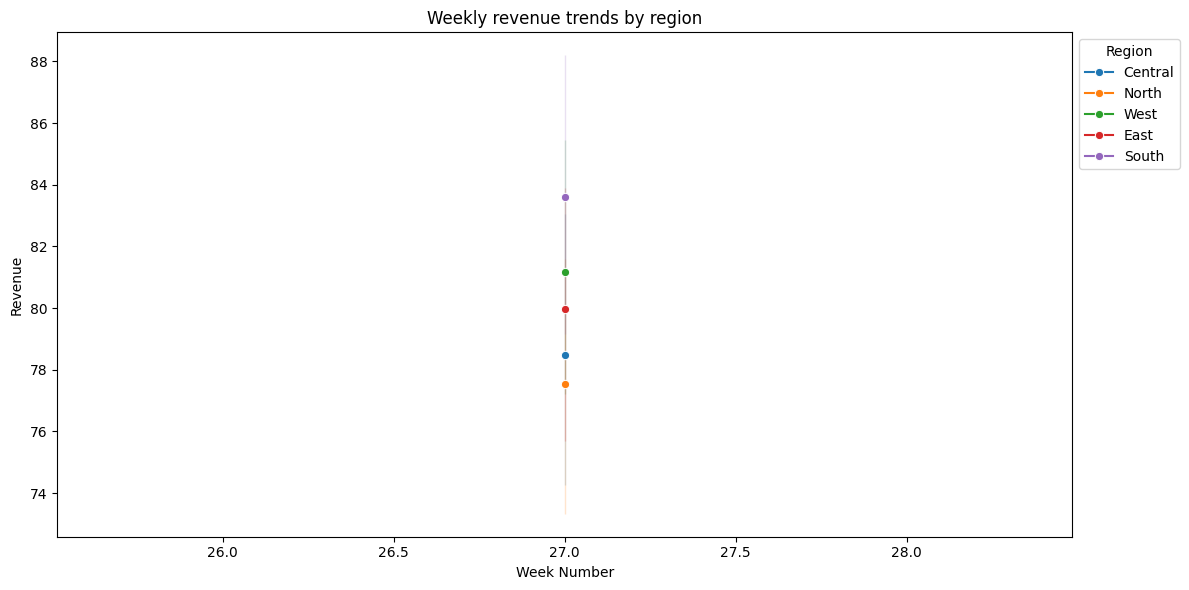

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Weekly revenue trends by order region
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_merged,
    x='order_week',
    y='revenue',
    hue='sales_region',
    marker='o'
)
plt.title('Weekly revenue trends by region')
plt.xlabel('Week Number')
plt.ylabel('Revenue')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

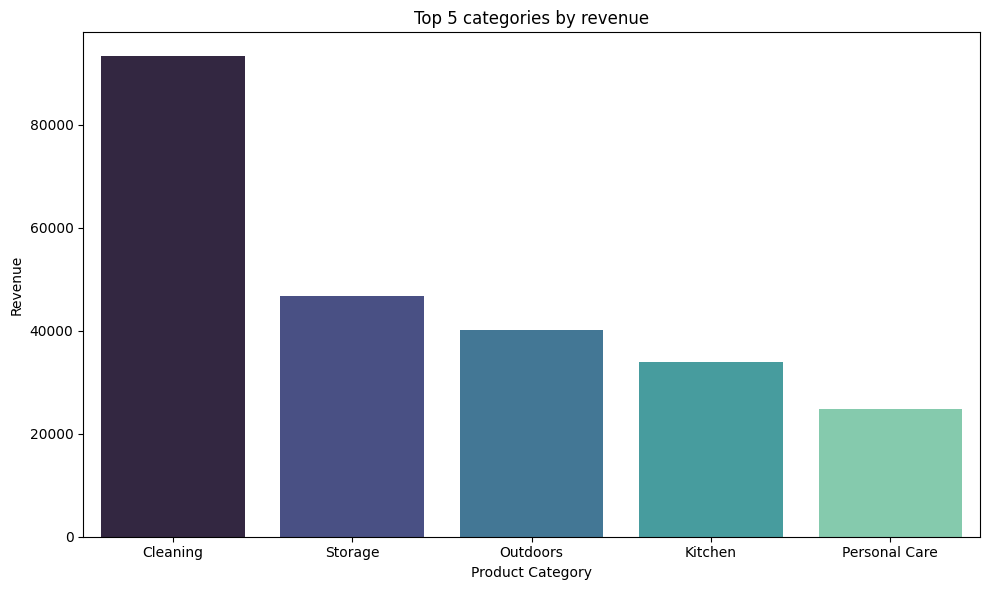

In [74]:
# Top 5 categories by revenue
plt.figure(figsize=(10, 6))
top_categories = (
    df_merged.groupby('category')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)
sns.barplot(data=top_categories, x='category', y='revenue', hue='category', palette='mako')
plt.title('Top 5 categories by revenue')
plt.ylabel('Revenue')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

In [75]:
# Check which categories perform best in each region
df_merged.groupby(['sales_region', 'category'])['revenue'].sum().sort_values(ascending=False)

sales_region  category     
East          Cleaning         19874.3030
South         Cleaning         18979.5760
North         Cleaning         18751.7035
West          Cleaning         17952.9345
Central       Cleaning         17717.8275
West          Storage          10014.4465
East          Storage           9454.3105
South         Storage           9345.3590
              Outdoors          9327.4165
Central       Storage           9233.2050
North         Storage           8715.0465
Central       Outdoors          7931.8460
West          Outdoors          7875.1030
North         Outdoors          7806.3265
South         Kitchen           7761.4045
East          Outdoors          7175.3340
              Kitchen           6695.8370
West          Kitchen           6674.0010
Central       Kitchen           6518.9710
North         Kitchen           6283.4625
Central       Personal Care     5616.1620
West          Personal Care     5213.3370
North         Personal Care     5207.5505
East          Personal Care     4616.1995
South         Personal Care     4239.0275
Name: revenue, dtype: float64

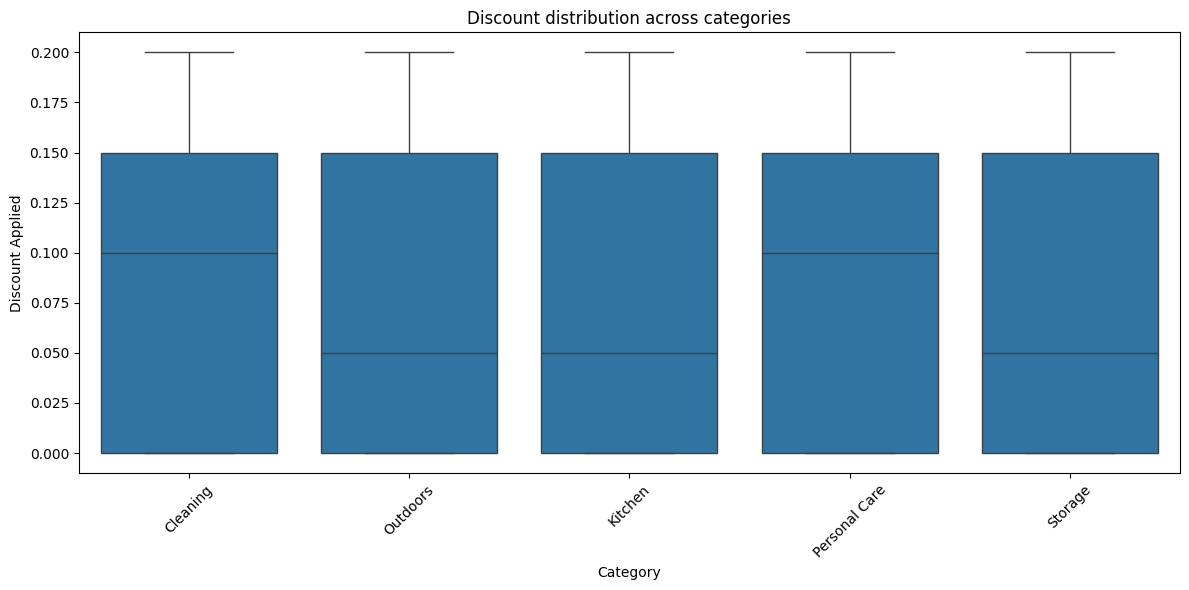

In [76]:
# Quantity vs discount across categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='category', y='discount_applied')
plt.title('Discount distribution across categories')
plt.ylabel('Discount Applied')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

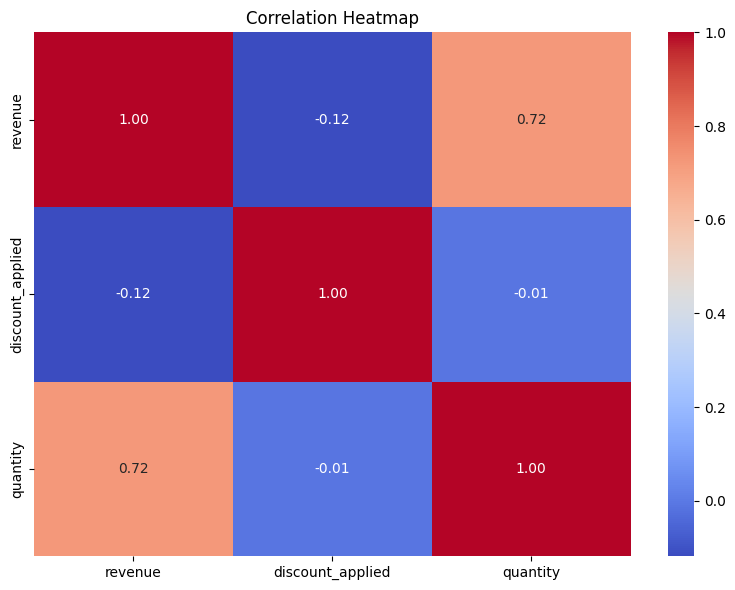

In [77]:
# Correlation between revenue, discount, and quantity
plt.figure(figsize=(8, 6))
corr_df = df_merged[['revenue', 'discount_applied', 'quantity']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

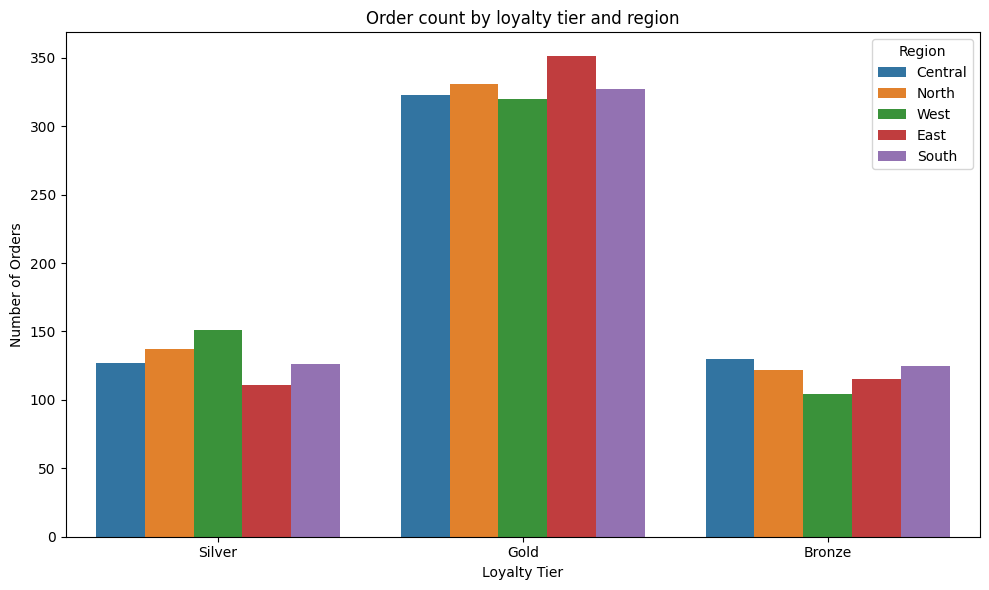

In [78]:
# Orders by loyalty tier (with hue = region)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, x='loyalty_tier', hue='sales_region')
plt.title('Order count by loyalty tier and region')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of Orders')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

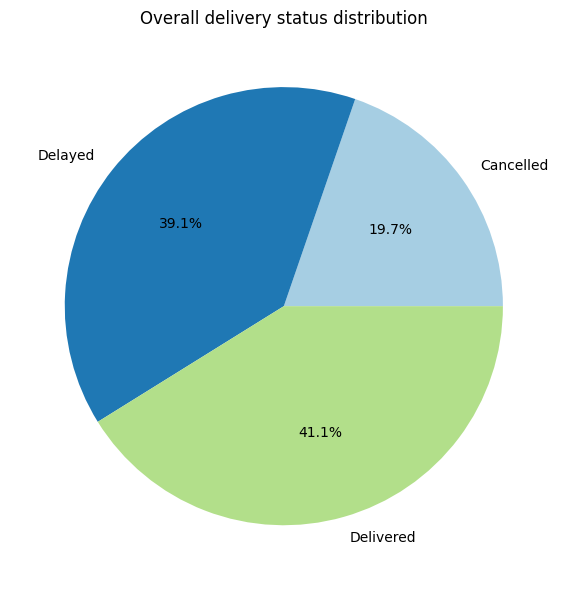

In [79]:
# Delivery status by price band

# Prepare the data for delivery status by price band
delivery_price_status = df_merged.groupby(['price_band', 'delivery_status'], observed=False).size().unstack(fill_value=0)

# Pie Chart
overall_delivery_status = df_merged.groupby('delivery_status').size()

plt.figure(figsize=(6, 6))
overall_delivery_status.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('Overall delivery status distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 7. Advanced Data Manipulation

*Find the Q2 customers that placed an order within 14 days and received atleast 20% discount*

In [80]:
# Create helper columns
df_merged['signup_quarter'] = df_merged['signup_date'].dt.quarter
df_merged['days_to_order'] = (df_merged['order_date'] - df_merged['signup_date']).dt.days

# Query to find the Q2 customers that placed an order within 14 days and received a >= 20% discount
q2_customers = df_merged.query(
    "signup_quarter == 2 and days_to_order <= 14 and discount_applied >= 0.20"
)

print(q2_customers)

     order_id customer_id product_id  quantity  unit_price order_date  \
32    O960238      C00259      P0009       2.0        9.58 2025-07-06   
155   O544736      C00369      P0013       5.0       21.96 2025-07-06   
809   O359280      C00369      P0029       5.0       22.28 2025-07-06   
1431  O380237      C00313      P0016       3.0        8.58 2025-07-06   
1543  O538559      C00069      P0006       2.0       43.09 2025-07-06   
1874  O851224      C00217      P0002       1.0       45.64 2025-07-06   
2498  O536999      C00313      P0029       2.0       26.65 2025-07-06   

     delivery_status payment_method sales_region  discount_applied  ...  \
32           Delayed    Credit Card         East               0.2  ...   
155        Delivered    Credit Card      Central               0.2  ...   
809        Delivered    Credit Card         East               0.2  ...   
1431       Cancelled         PayPal        South               0.2  ...   
1543         Delayed         PayPal     

*Normalise revenue*

In [81]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Create a new column to store the normalised revenue
df_merged['normalised_revenue'] = scaler.fit_transform(df_merged[['revenue']])

# View the two columns side by side
df_merged[['revenue', 'normalised_revenue']].head(5)

,revenue,normalised_revenue
0,117.750,0.457431
1,94.600,0.361987
2,25.228,0.075976
3,26.208,0.080016
4,38.096,0.129029


*Flag underperforming products (low quantity, high discount, delayed deliveries)*

In [82]:
# Create flag column
df_merged['underperforming'] = (
    (df_merged['quantity'] < 5) &
    (df_merged['discount_applied'] >= 0.15) &
    (df_merged['delivery_status'] == 'Delayed')
)

# See how many distinct products are underperforming
underperforming_df = df_merged[df_merged['underperforming'] == True]
underperforming_df[['product_id', 'product_name', 'category']].drop_duplicates().reset_index(drop=True)

,product_id,product_name,category
0,P0016,Cleaning Product 53,Cleaning
1,P0002,Cleaning Product 82,Cleaning
2,P0019,Kitchen Product 42,Kitchen
3,P0009,Outdoors Product 13,Outdoors
4,P0029,Cleaning Product 69,Cleaning
5,P0026,Storage Product 50,Storage
6,P0006,Cleaning Product 16,Cleaning
7,P0017,Personal Care Product 11,Personal Care
8,P0020,Cleaning Product 40,Cleaning
9,P0021,Kitchen Product 70,Kitchen
